# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 20.3 MB/s eta 0:00:01
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
from ipywidgets import FloatProgress

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Lambda(torch.flatten),
                                transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root = 'data',train=True,
             transform = transform,download=True)

print(train_data[0][0].shape)

train_loader = DataLoader(train_data, batch_size= 64, shuffle = True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root = 'data',train=False,
            transform = transform, download=True)

print(test_data[0][0].shape)

test_loader = DataLoader(test_data, batch_size= 64,shuffle = True)


torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I chose to convert the data to Tensor because Pytorch works with tensors...
Furthermore, i decided to renormalize in order to change the pixels between -1 and +1, which is preferred by most activation functions**

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    
    print(f"number of images{images.shape}")
    print(f"number of labels {labels.shape}")
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

number of imagestorch.Size([5, 1, 28, 28])
number of labels torch.Size([5])
9


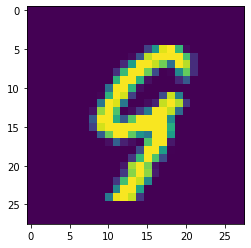

5


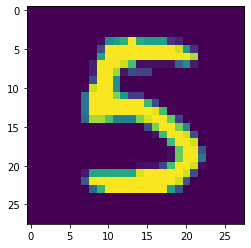

0


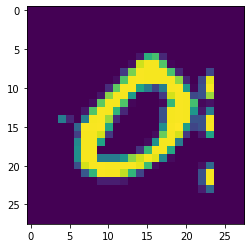

5


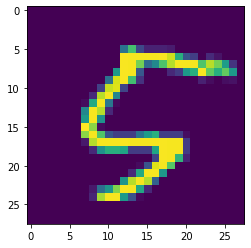

9


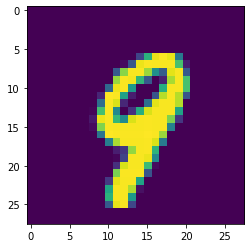

In [5]:
# Explore data

show5(train_loader)

In [6]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

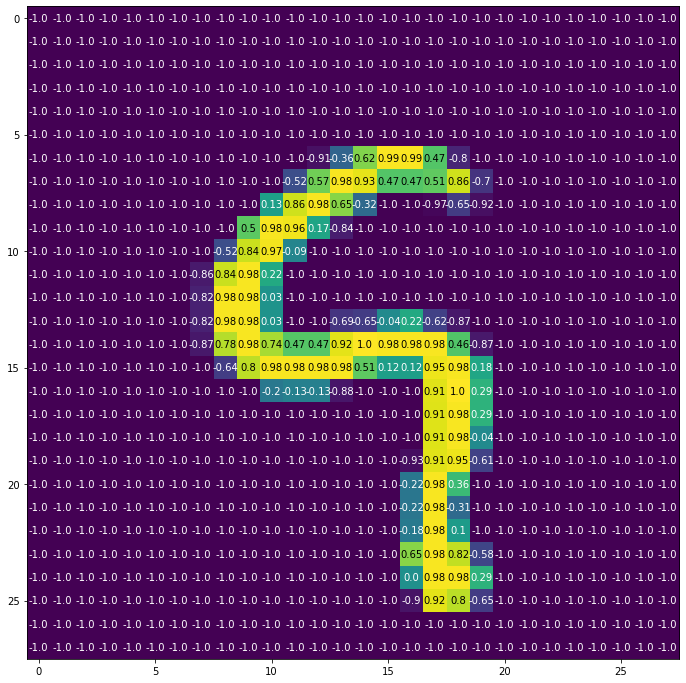

In [7]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img)
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# WITH FLATTENING

In [12]:
# from torch.utils.data import DataLoader

# # Define transforms
# transform1 = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Lambda(torch.flatten),
#                                 transforms.Normalize((0.5,),(0.5,))])

# # Create training set and define training dataloader
# train_data1 = torchvision.datasets.MNIST(root = 'data',train=True,
#              transform = transform1,download=True)

# # print(train_data1[0][0].shape)

# train_loader1 = DataLoader(train_data1, batch_size= 64, shuffle = True)

# # Create test set and define test dataloader
# test_data1 = torchvision.datasets.MNIST(root = 'data',train=False,
#             transform = transform1, download=True)

# # print(test_data1[0][0].shape)

# test_loader1 = DataLoader(test_data1, batch_size= 64,shuffle = True)


In [13]:
# show5(train_loader1)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # the input layer(1d vector of 28*28) 
        self.fc1 = nn.Linear(28 * 28, 128)
        # 1st hidden layer
        self.fc2 = nn.Linear(128, 64)
        # 2nd hidden layer
        self.fc3 = nn.Linear(64, 32)
        #3rd hidden layer to output
        self.fc4 = nn.Linear(32, 10)
        # dropout layer (p=0.2)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self,x):
        
        #flattening the img input
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        x = self.fc4(x) #output
        return x
        
        
                        


In [7]:
model = Net()
print(model.parameters)

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
#Stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr = 0.02, momentum = 0.9)

#Due to multi-class model
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Establish a list for our history(implementation of early_stopping)
train_loss_history = list()
val_loss_history = list()

def train_model(net, epochs = 50, learning_rate = 0.02, optimizer = optimizer,criterion = criterion):
    #epochs- the number of times you loop through the dataset
#     # Establish a list for our history(implementation of early_stopping)
#     train_loss_history = list()
#     val_loss_history = list()
    
    #setting best_val_loss 
    best_val_loss = float("inf")
    
    #Threshold for min performance improvement
    thresh = 0.001
    
    #below thresh count
    below_thresh = 0
    
    #limit to no. of epochs below thresh
    limit = 2
    
    print("Training process initializing .....\n")
    
    #Iterating over the number of epochs
    
    for epoch in range(epochs): # for every epochs in the range do the following below
        net.train() # entering training mode, activates Dropout layers
        
        #set training loss to zero
        train_loss = 0.0
        
        #setting num of correct pred to 0
        train_correct = 0
        
        #inputs are in form of images  N/B: the data var containes one batch of 64
        for idx, data in enumerate(train_loader):
            #getting actual inputs
            inputs, labels = data
            
            #moving the inputs n labels to GPU device if available
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            #zeros all gradients on each training parts to avoid accumulation of gradients.
            optimizer.zero_grad()
            
            #outputs is the log probabilities of the categories/classes
            outputs = net(inputs)
            
            #calculating the losses
            loss = criterion(outputs, labels)
            
            #calculating the gradients with respect to the params
            loss.backward()
            
            #updating the weights
            optimizer.step()
            
            #geting class predictions from the outputs
            _, preds = torch.max(outputs.data, 1)
            
            #update the no of correct predictions for epoch
            train_correct += (preds == labels).sum().item()
            
            #updating the running loss
            train_loss += loss.item()
            
        #printing running accuracy and loss 
        print(f'Epoch {epoch + 1} Training accuracy: {train_correct/len(train_loader): .3f}% Training loss: {train_loss/len(train_loader): .4f}')
        
        train_loss_history.append(train_loss/len(train_loader))
        #Performing validation
        val_loss = 0.0
        val_correct = 0
        
        #Notifying the layers you are entering evaluation mode
        net.eval() #de-activates Dropout layers
        
        # deativates autograd thus disabling gradients calculation(reduces memory consumption)
        with torch.no_grad():
            for inputs, labels in test_loader: # acts as the validation loader though its from the test dataset
                    if torch.cuda.is_available():
                        inputs, labels = inputs.cuba(), labels.cuda() 
                            
                        logps = model.forward(inputs)
                        batch_loss = criterion(logps, labels)
                    
                    outputs = net(inputs)
                    
                    loss = criterion(outputs, labels)
                    
                    _, preds = torch.max(outputs.data, 1)
                    
                    val_correct += (preds == labels).sum().item()
                    
                    val_loss += loss.item()
              
            #Print validation
            print(f'Epoch {epoch + 1} Validation accuracy: {val_correct/len(test_loader): .3f}%  Validation loss:{val_loss/len(test_loader): .4f}')
            val_loss_history.append(val_loss/len(test_loader))  
            
            #Calculating diff btwn best_val_loss n current
            diff = best_val_loss - val_loss
            
            #set val loss to the current val_loss if small
            if best_val_loss > val_loss:
                best_val_loss = val_loss
            
            # checking if diff is below thresh
            if diff <= thresh:
                below_thresh +=1
                #check if thresh > limit
                if below_thresh >= limit:
                    break
                
        #Returning back to training mode
        net.train()
        
    
    print('Your Training is DONE!!!')       
                     
    

        
    

In [10]:
train_model(model)

Training process initializing .....

Epoch 1 Training accuracy:  51.584% Training loss:  0.6181
Epoch 1 Validation accuracy:  59.210%  Validation loss: 0.2301
Epoch 2 Training accuracy:  57.983% Training loss:  0.3222
Epoch 2 Validation accuracy:  60.261%  Validation loss: 0.1877
Epoch 3 Training accuracy:  59.141% Training loss:  0.2661
Epoch 3 Validation accuracy:  60.777%  Validation loss: 0.1575
Epoch 4 Training accuracy:  59.711% Training loss:  0.2330
Epoch 4 Validation accuracy:  61.076%  Validation loss: 0.1371
Epoch 5 Training accuracy:  60.197% Training loss:  0.2111
Epoch 5 Validation accuracy:  61.083%  Validation loss: 0.1337
Epoch 6 Training accuracy:  60.499% Training loss:  0.1934
Epoch 6 Validation accuracy:  61.529%  Validation loss: 0.1147
Epoch 7 Training accuracy:  60.693% Training loss:  0.1838
Epoch 7 Validation accuracy:  61.439%  Validation loss: 0.1194
Epoch 8 Training accuracy:  60.837% Training loss:  0.1725
Epoch 8 Validation accuracy:  61.484%  Validation 

Plot the training loss (and validation loss/accuracy, if recorded).

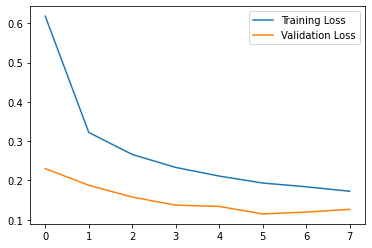

In [11]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

**Thanks to the implementation of early stopping, I have managed to save on training time with little or no improvement in the losses**

**Furthermore, from the plotted graph it is clear that we have a good model since both training loss and validation loss are decreasing but its clearly Underfitting**

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
# def test():
#     model.train(False)  # ensure we're in eval mode

#     test_loss = []
#     test_acc = []
    
#     for X,y in test_loader: #X,y is the image and label
#         with torch.no_grad():
#             X, y = X.to(device = 'GPU'), y.to(device = 'GPU')
#             predictions = model(X.reshape(X.shape[0], -1))

#             loss = criterion(predictions, y)
#             test_loss.append(loss.item())

#             test_acc.append((predictions.argmax(dim=1).cpu().numpy() == y.cpu().numpy()).mean())

# print(f'Accuracy: {np.mean(test_acc):.2f}, Loss: {np.mean(test_loss):.2f}')

Accuracy: nan, Loss: nan


In [23]:
batch_size = 10

In [24]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for training

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.126983

Test Accuracy of     0: 100% (152/152)
Test Accuracy of     1: 98% (173/175)
Test Accuracy of     2: 99% (166/167)
Test Accuracy of     3: 95% (160/168)
Test Accuracy of     4: 97% (144/147)
Test Accuracy of     5: 90% (131/145)
Test Accuracy of     6: 97% (139/142)
Test Accuracy of     7: 93% (151/161)
Test Accuracy of     8: 94% (160/169)
Test Accuracy of     9: 93% (134/144)

Test Accuracy (Overall): 96% (1510/1570)


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

**Hyperparameter Tuning**

1. Introducing Regulaization with weight_decay = 0.001
2. Changing the learning rate i.e lr = 0.01
3. Adding a generator with random seed for consistency.
4. Changing the hidden layer constructor fn.
5. Splitting the dataset into Train, validation and test set
6. Increasing the number of epochs

# 1.Splitting the data into Test,Validation and Training set

In [4]:
#Splitting the train_data into 80% for training and 20% for Validation

train_len = int(len(train_data)*0.8)
val_len = len(train_data) - train_len

# print(f'Using {train_len} for training and {val_len} for Validation')

train_dataset, validation_dataset = torch.utils.data.random_split(train_data,[train_len,val_len],generator = torch.Generator().manual_seed(42))



In [5]:
#Creating the datasets

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,shuffle=True,batch_size = 64,num_workers = 2)

valid_loader = torch.utils.data.DataLoader(dataset = validation_dataset,shuffle=False, batch_size = 64, num_workers = 2)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
print(f"Using {len(test_data)} for testing")

Using 10000 for testing


# 2. Visualization (EDA)

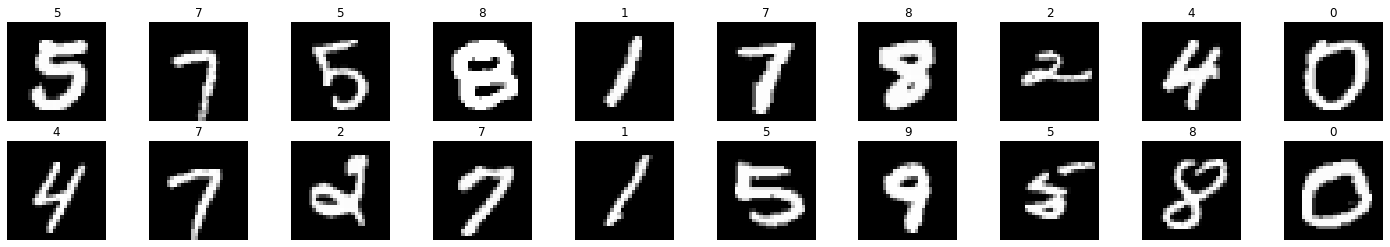

In [7]:
# import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig, subs = plt.subplots(2, 10, figsize=(25, 4))
for idx, sub in zip(np.arange(20), subs.flatten()):
    sub.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    
    # .item() gets the value contained in a Tensor
    sub.set_title(str(labels[idx].item()))
    sub.axis("off")

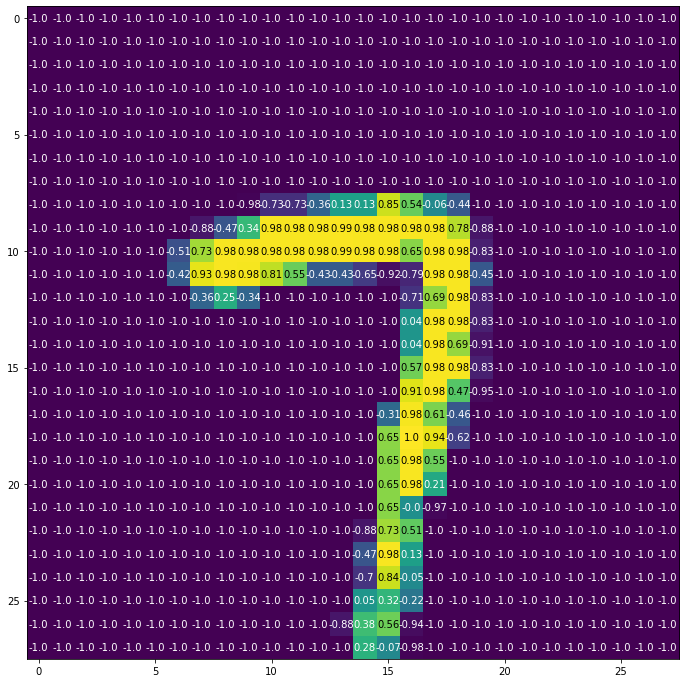

In [8]:
#Viewing an image 
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img)
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

**From above we can clearly see that the image pixels are bewen -1 and +1 as a reseult of transformation**

# Defining the Network Architecture

In [9]:
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        #Formula for output = (input+output)/2
            
        # 1st layer(input)
        self.fc1 = nn.Linear(28*28, 400)
        #dropout
        self.dropout1 = nn.Dropout(0.2)
        #2nd hidden layer
        self.fc2 = nn.Linear(400,200)
        #dropout
        self.dropout2 = nn.Dropout(0.2)
        #output layer
        self.output = nn.Linear(200,10)
            
    def forward(self,x):
        #flattening
        x = torch.flatten(x, 1)
        
        #adding ReLU as the activation function
        x = F.relu(self.fc1(x))
        #dropout layer
        x = self.dropout1(x)
        #adding ReLU as the activation function
        x = F.relu(self.fc2(x))
        #dropout layer
        x = self.dropout2(x)
        x = self.output(x)
        
        return x        
    
            
    

In [10]:
#Initialize

model = MLP()

In [11]:
model.parameters

<bound method Module.parameters of MLP(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (output): Linear(in_features=200, out_features=10, bias=True)
)>

# 3. Specifying Loss and Optimizer function

In [12]:
#Stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 0.001)

#Due to multi-class model
criterion = nn.CrossEntropyLoss()

# 4.Training the Network

In [13]:
# Establish a list for our history(implementation of early_stopping)
train_loss_history = list()
val_loss_history = list()

def train_model(net, epochs = 50, learning_rate = 0.01, optimizer = optimizer,criterion = criterion):
    #epochs- the number of times you loop through the dataset
    
    #setting best_val_loss 
    best_val_loss = float("inf")
    
    #Threshold for min performance improvement
    thresh = 0.001
    
    #below thresh count
    below_thresh = 0
    
    #limit to no. of epochs below thresh
    limit = 2
    
    print("Training process initializing .....\n")
    
    #Iterating over the number of epochs
    
    for epoch in range(epochs): # for every epochs in the range do the following below
        net.train() # entering training mode, activates Dropout layers
        
        #set training loss to zero
        train_loss = 0.0
        
        #setting num of correct pred to 0
        train_correct = 0
        
        #inputs are in form of images  N/B: the data var containes one batch of 64
        for idx, data in enumerate(train_loader):
            #getting actual inputs
            #inputs = batch_indexes and labels = img,target
            inputs, labels = data
            
            #moving the inputs n labels to GPU device if available
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            #zeros all gradients on each training parts to avoid accumulation of gradients.
            optimizer.zero_grad()
            
            #outputs is the log probabilities of the categories/classes
            output = net(inputs)
            
            #calculating the losses
            loss = criterion(output, labels)
            
            #calculating the gradients with respect to the params
            loss.backward()
            
            #updating the weights
            optimizer.step()
            
            #geting class predictions from the outputs
            _, preds = torch.max(output.data, 1)
            
            #update the no of correct predictions for epoch
            train_correct += (preds == labels).sum().item()
            
            #updating the running loss
            train_loss += loss.item()
            
        #printing running accuracy and loss 
        print(f'Epoch {epoch + 1} Training Accuracy: {train_correct/len(train_loader): .3f}% Training loss: {train_loss/len(train_loader): .4f}')
        
        train_loss_history.append(train_loss/len(train_loader))
        
        
        #Performing Validation
        val_loss = 0.0
        val_correct = 0
        
        #Notifying the layers you are entering evaluation mode
        net.eval() #de-activates Dropout layers
        
        # deativates autograd thus disabling gradients calculation(reduces memory consumption)
        with torch.no_grad():
            for inputs, labels in valid_loader: # acts as the validation loader though its from the test dataset
                    if torch.cuda.is_available():
                        inputs, labels = inputs.cuba(), labels.cuda() 
                            
                        logps = model.forward(inputs)
                        batch_loss = criterion(logps, labels)
                    
                    output = net(inputs)
                    
                    loss = criterion(output, labels)
                    
                    _, preds = torch.max(output.data, 1)
                    
                    val_correct += (preds == labels).sum().item()
                    
                    val_loss += loss.item()
              
            #Print validation
            print(f'Epoch {epoch + 1} Validation Accuracy: {val_correct/len(valid_loader): .3f}%  Validation loss:{val_loss/len(valid_loader): .4f}')
            val_loss_history.append(val_loss/len(test_loader))  
            
            #Calculating diff btwn best_val_loss n current
            diff = best_val_loss - val_loss
            
            #set val loss to the current val_loss if small
            if best_val_loss > val_loss:
                best_val_loss = val_loss
            
            # checking if diff is below thresh
            if diff <= thresh:
                below_thresh +=1
                #check if thresh > limit
                if below_thresh >= limit:
                    break
                
        #Returning back to training mode
        net.train()
        
    
    print('Your Training is DONE!!!')       
                     
    


In [14]:
train_model(model)

Training process initializing .....

Epoch 1 Training Accuracy:  54.279% Training loss:  0.4966
Epoch 1 Validation Accuracy:  59.138%  Validation loss: 0.2427
Epoch 2 Training Accuracy:  59.619% Training loss:  0.2205
Epoch 2 Validation Accuracy:  60.787%  Validation loss: 0.1661
Epoch 3 Training Accuracy:  60.687% Training loss:  0.1673
Epoch 3 Validation Accuracy:  61.053%  Validation loss: 0.1380
Epoch 4 Training Accuracy:  61.259% Training loss:  0.1421
Epoch 4 Validation Accuracy:  61.367%  Validation loss: 0.1282
Epoch 5 Training Accuracy:  61.536% Training loss:  0.1245
Epoch 5 Validation Accuracy:  61.383%  Validation loss: 0.1280
Epoch 6 Training Accuracy:  61.796% Training loss:  0.1127
Epoch 6 Validation Accuracy:  61.803%  Validation loss: 0.1072
Epoch 7 Training Accuracy:  61.925% Training loss:  0.1024
Epoch 7 Validation Accuracy:  61.894%  Validation loss: 0.1004
Epoch 8 Training Accuracy:  62.112% Training loss:  0.0952
Epoch 8 Validation Accuracy:  61.947%  Validation 

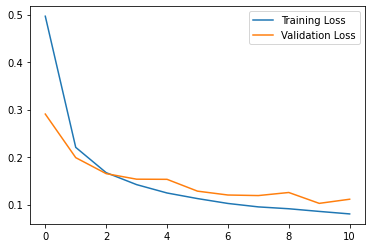

In [15]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

**We can see an improvement**

# 5. Testing the model

In [17]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for training

for data, target in test_loader:
    # forward pass: compute predicted outputs
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class scores
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(data.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)

print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10): #recall the number of classes are 10
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.085715

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 98% (1121/1135)
Test Accuracy of     2: 97% (1010/1032)
Test Accuracy of     3: 97% (983/1010)
Test Accuracy of     4: 97% (959/982)
Test Accuracy of     5: 97% (868/892)
Test Accuracy of     6: 98% (942/958)
Test Accuracy of     7: 96% (995/1028)
Test Accuracy of     8: 97% (947/974)
Test Accuracy of     9: 92% (937/1009)

Test Accuracy (Overall): 97% (9734/10000)


**From above we can clearly see 1% improvemnt in Test Accuracy as compared to the previous model**

**Also we have achieved a smaller Test loss as compared to the result with the previous model.**

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
# saved_model = torch.save(model, '.')
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_save.pt') # Save

In [24]:
torch.save(model, 'model_1.pt')